In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [4]:
x = sp.Symbol('x')
x

In [5]:
w = sp.Symbol('omega')
w

In [6]:
w = sp.Symbol('omega_0')
w

In [8]:
i = sp.Integer(10)
i, type(i)

(10, sympy.core.numbers.Integer)

In [13]:
58**2340

In [14]:
sp.Pow(58, 2340)

In [22]:
y = sp.factorial(5892)

In [25]:
f = sp.Float(0.3)
f, type(f)

(0.300000000000000, sympy.core.numbers.Float)

In [26]:
f = sp.Float(0.3, 30)
f, type(f)

(0.299999999999999988897769753748, sympy.core.numbers.Float)

In [27]:
f = sp.Float('0.3', 30)
f, type(f)

(0.300000000000000000000000000000, sympy.core.numbers.Float)

In [28]:
r = sp.Rational(3, 7)
r, type(r)

(3/7, sympy.core.numbers.Rational)

In [31]:
r.evalf(30)

In [33]:
ex = 2 * x**2 + 1
ex

In [36]:
n = sp.Symbol('n')
n, sp.sin(sp.pi * n), sp.cos(sp.pi * n)

In [38]:
n = sp.Symbol('n', integer=True)
n, sp.sin(sp.pi * n), sp.cos(sp.pi * n)

In [53]:
x = sp.Symbol('x')
a = sp.Symbol('a', positive=True)

ex = sp.exp(-a * x**2)
ex

In [43]:
ex.diff(x)

In [44]:
ex.diff(x, x)

In [46]:
dex = ex.diff(x, 10)
dex

In [47]:
dex.subs(a, 5)

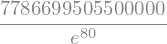

In [48]:
dex.subs(a, 5).subs(x, 4)

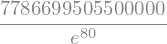

In [49]:
dex.subs({a: 5, x: 4})

In [50]:
dex.subs({a: 5, x: 4}).evalf(50)

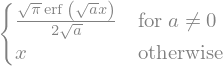

In [51]:
sp.integrate(ex, x)

In [54]:
sp.integrate(ex, (x, -sp.oo, sp.oo))

In [55]:
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
x = sp.Symbol('x')

a, b, c, x

In [56]:
sp.symbols('a b c x')

In [57]:
a * x**2 + b * x + c

In [58]:
eq = sp.Eq(a * x**2 + b * x + c, 0)
eq

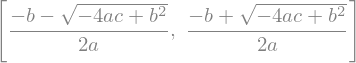

In [59]:
sp.solve(eq, x)

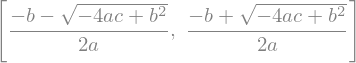

In [60]:
sp.solve(a * x**2 + b * x + c, x)

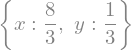

In [62]:
x, y = sp.symbols('x y')
sp.solve((x + y - 3, 2 * x - y - 5), (x, y))

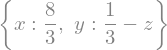

In [63]:
x, y, z = sp.symbols('x y z')
sp.solve((x + y - 3 + z, 2 * x - y - 5 - z), (x, y))

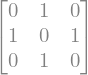

In [64]:
m = sp.Matrix([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])

m

In [65]:
m.det()

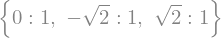

In [66]:
m.eigenvals()

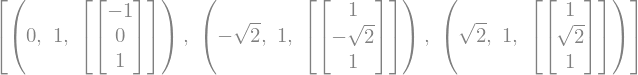

In [67]:
m.eigenvects()

$$\frac{d^2x(t)}{dt^2}=-\omega_0^2x(t)$$

In [75]:
x = sp.Function('x')
t = sp.Symbol('t')
w0 = sp.Symbol('omega_0', positive=True)
x0 = sp.Symbol('x_0', real=True)
v0 = sp.Symbol('v_0', real=True)

x(t), t, w0, x0, v0

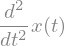

In [71]:
x(t).diff(t, t)

In [72]:
-w0**2 * x(t)

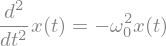

In [76]:
eq = sp.Eq(x(t).diff(t, t), -w0**2 * x(t))
eq

In [77]:
sp.dsolve(eq, x(t))

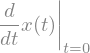

In [80]:
x(t).diff(t).subs(t, 0)

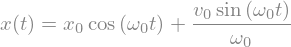

In [82]:
sol = sp.dsolve(eq, x(t), ics={x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol

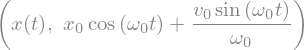

In [84]:
sol.lhs, sol.rhs

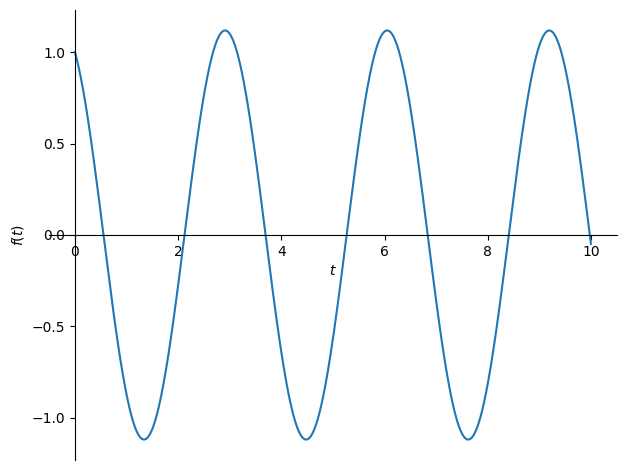

In [87]:
sp.plot(sol.rhs.subs({w0: 2, x0: 1, v0: -1}), (t, 0, 10))

In [89]:
solf = sp.lambdify(t, sol.rhs.subs({w0: 2, x0: 1, v0: -1}))
type(solf)

function

In [91]:
solf(3), type(solf(3))

(np.float64(1.0998780357498288), numpy.float64)

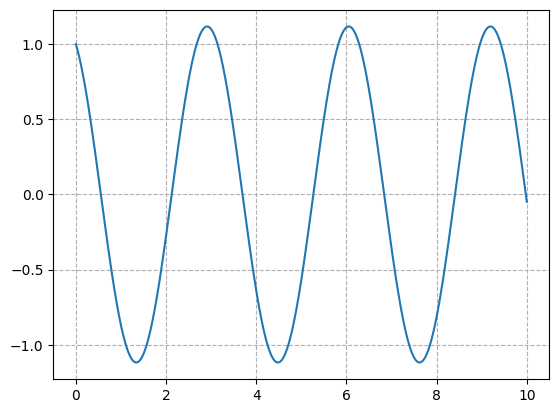

In [93]:
ts = np.linspace(0, 10, 1000)
plt.plot(ts, solf(ts))
plt.grid(linestyle='--')